<a href="https://colab.research.google.com/github/ProfAndersonVanin/algoritmo_genetico/blob/main/Algoritmo_Genetico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALGORITMOS GENÉTICOS - DEAP

DISTRIBUTED EVOLUTIONARY ALGORITHMS IN PYTHON

## Instalação da biblioteca

In [1]:
!pip install deap

     |████████████████████████████████| 160 kB 7.4 MB/s 


## Problema a ser resolvido

Encontrar a melhor rota que percorre todas as distribuidoras

**Melhor** = **Menor Distância**

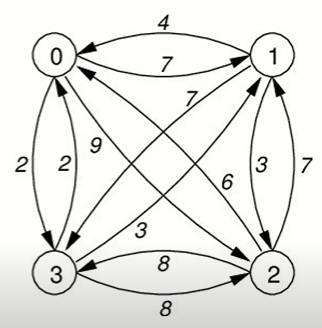

## **Biblioteca DEAP**

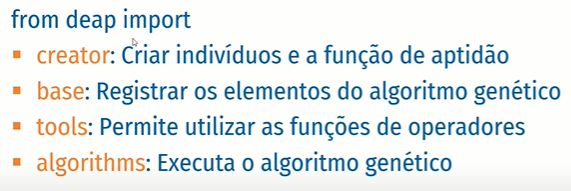

Importando os módulos da biblioteca deap

In [2]:
from deap import creator, base, tools, algorithms

### **CREATOR**

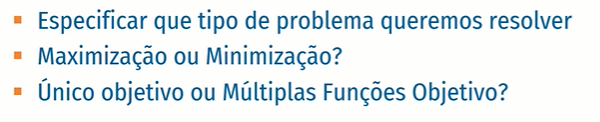

Criação (Aptidão)

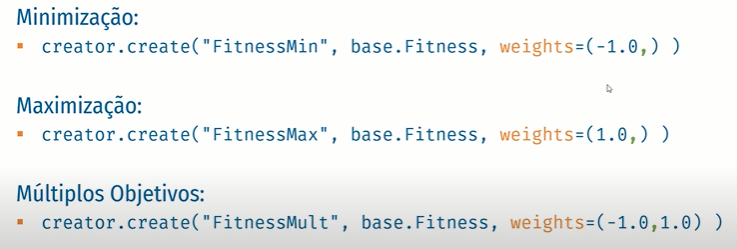

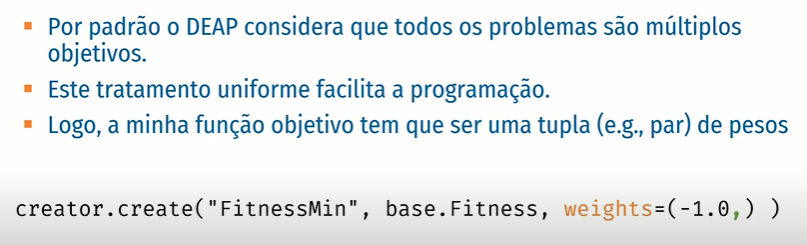

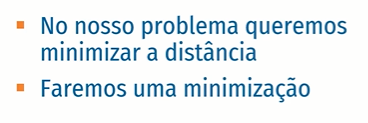

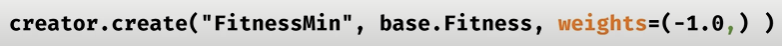

Criação (Cromossomo)

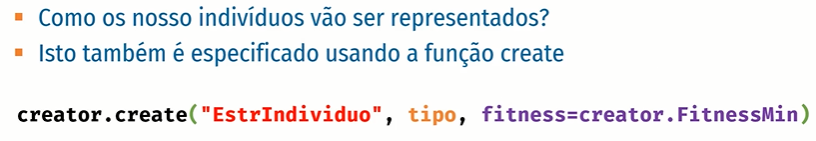

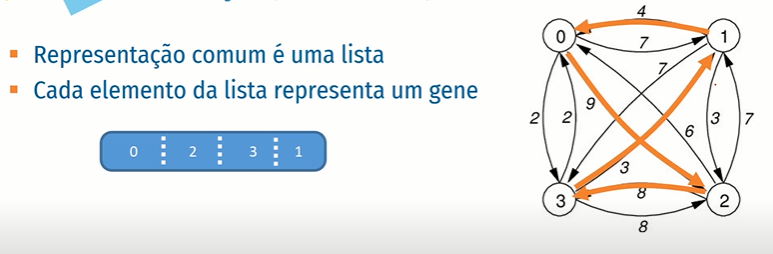

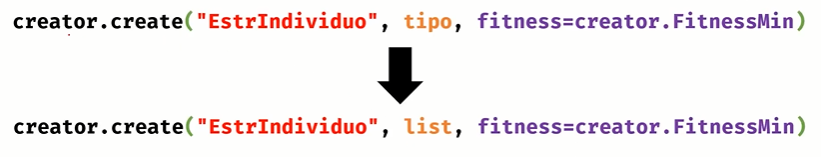

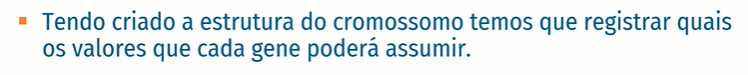

Registro (base)

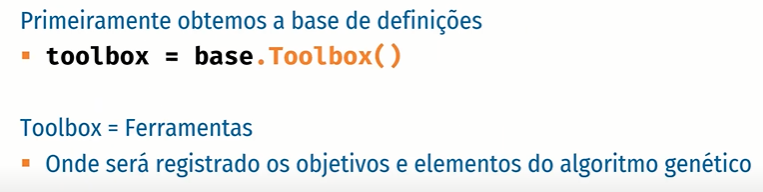

Registro (Número de Genes)

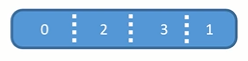

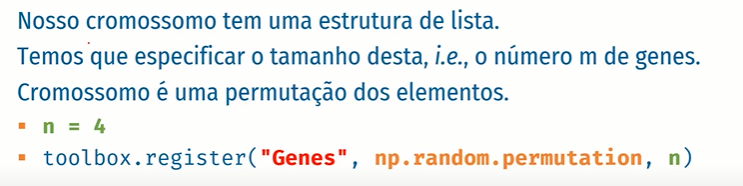

Registro (Indivíduos)

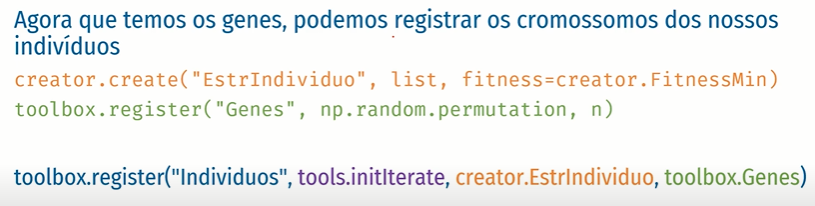

Registro (População)

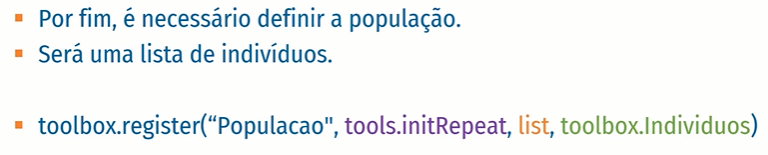

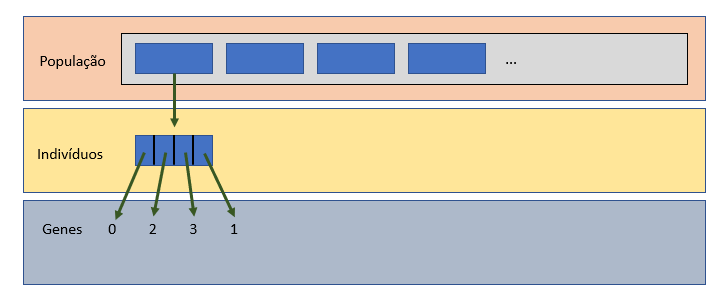

## Importando outras bibliotecas

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Iniciando as configurações e registros

In [4]:
toolbox = base.Toolbox()
n = 4

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("EstrIndividuo", list, fitness=creator.FitnessMin)

toolbox.register("Genes", np.random.permutation, n)
toolbox.register("Individuos", tools.initIterate, creator.EstrIndividuo, toolbox.Genes)

Criando a população

In [5]:
toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)

Registro (População)

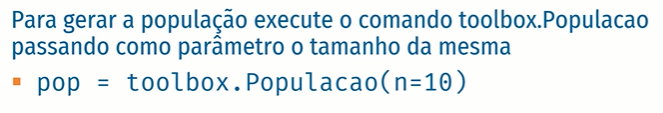

In [21]:
pop = toolbox.Populacao(n=4)

Registro (Operadores)

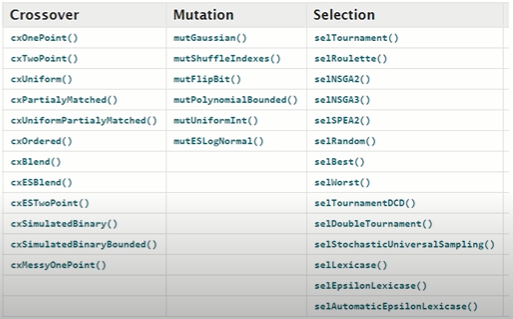

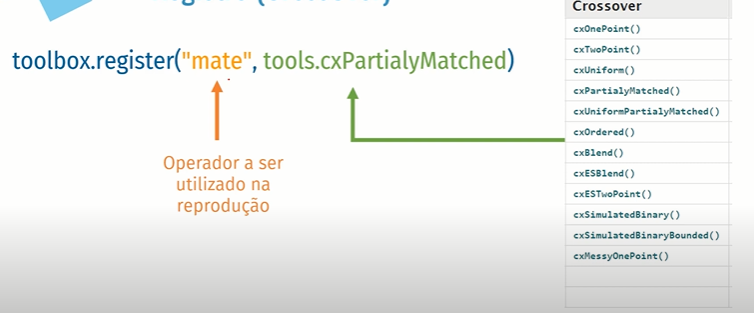

Partially Matched Crossover (PMX)

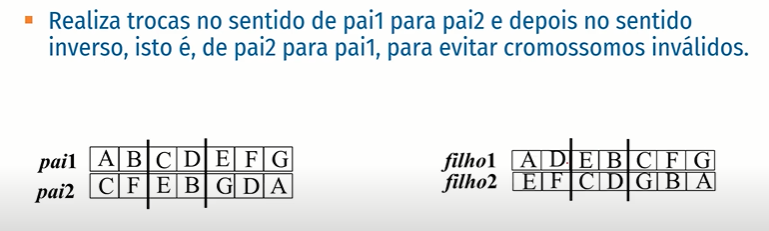

Mutação de Permutação

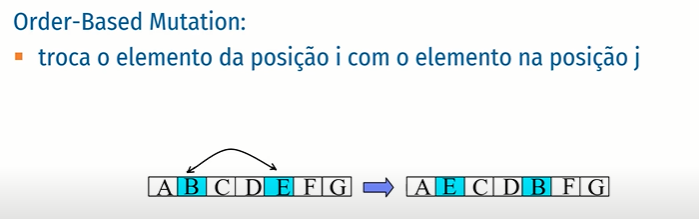

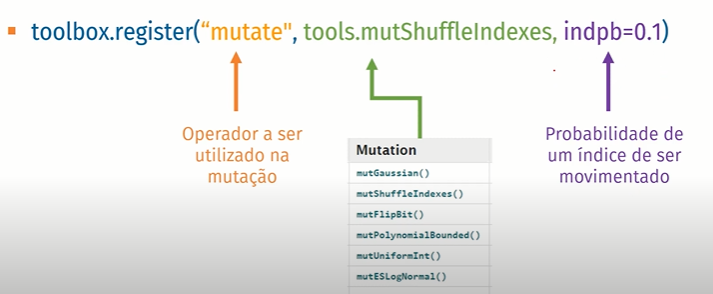

Seleção por Torneio

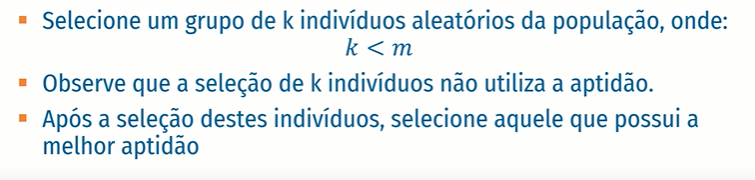

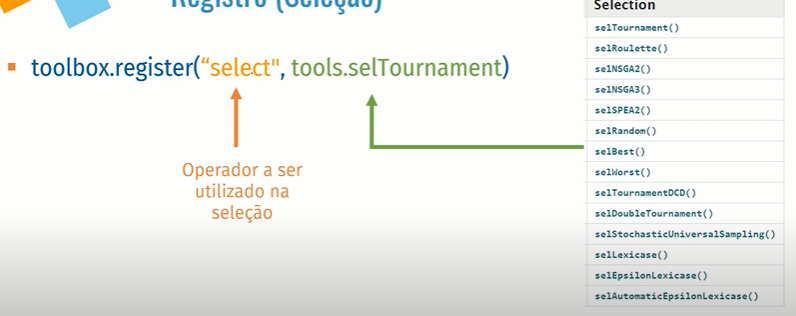

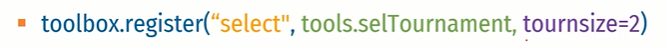

Aptidão

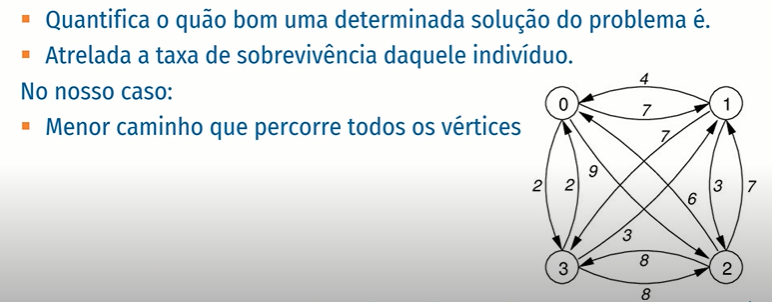

**No nosso caso será o menor caminho que passará por todos os vértices!**

Representar o grafo por uma matriz de adjacência

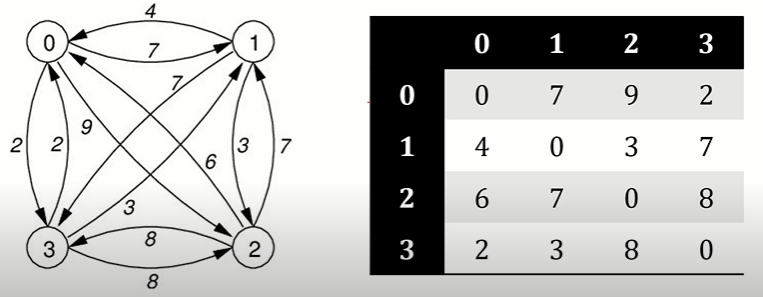

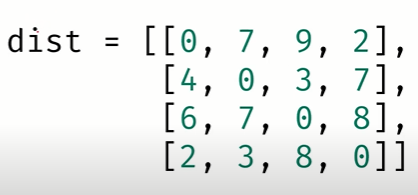

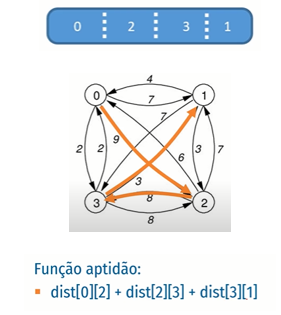

Registro da Função de Aptidão

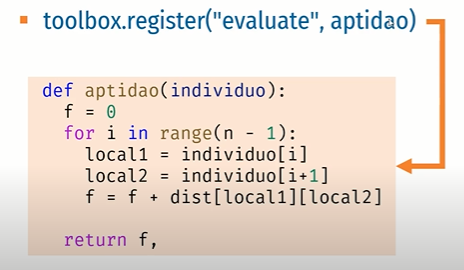

In [22]:
# Registrando os operadores de Crossover, Seleção e Aptidão
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=2)

Criando a Matriz de distâncias

In [23]:
dist = [[0, 7, 9, 2],
        [4, 0, 3, 7],
        [6, 7, 0, 8],
        [2, 3, 8, 0]]

In [24]:
def aptidao(individuo):
  f = 0
  for i in range(n - 1):
    local1 = individuo[i]
    local2 = individuo[i + 1]
    distancia = dist[local1][local2]
    f = f + distancia
  return f,

In [25]:
# Aqui é o registro da função de avaliação da aptidão
toolbox.register("evaluate", aptidao)

Estatística

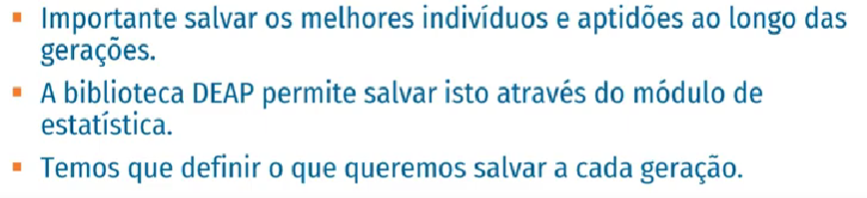

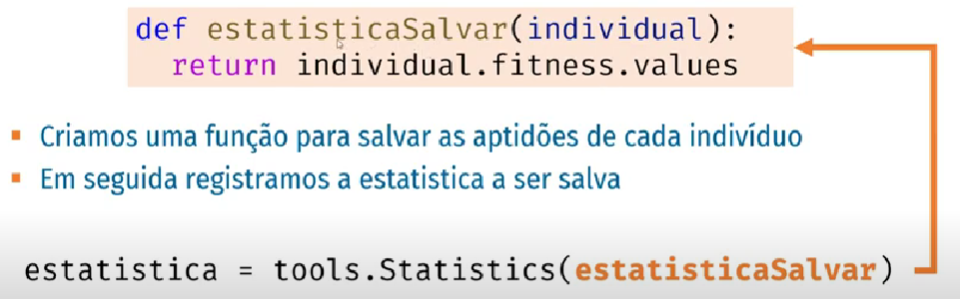

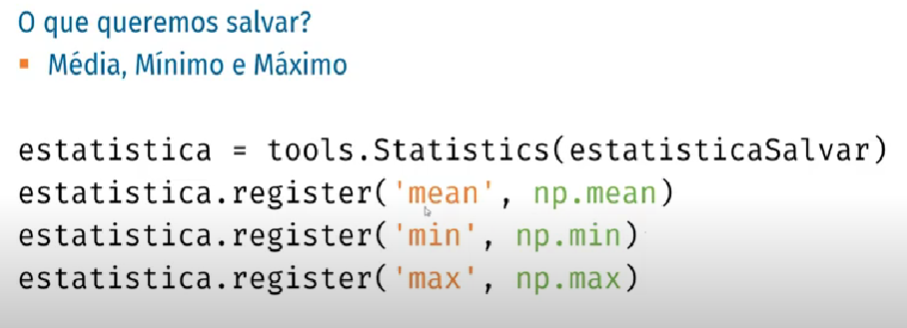

Hall of Fame

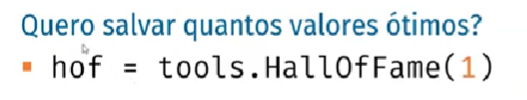

In [26]:
def estatisticaSalvar(individuo):
  return individuo.fitness.values

In [27]:
estatistica = tools.Statistics(estatisticaSalvar)
estatistica.register('mean', np.mean)
estatistica.register('max', np.max)
estatistica.register('min', np.min)

In [28]:
hof = tools.HallOfFame(1)

# Algoritmo Genético - Execução

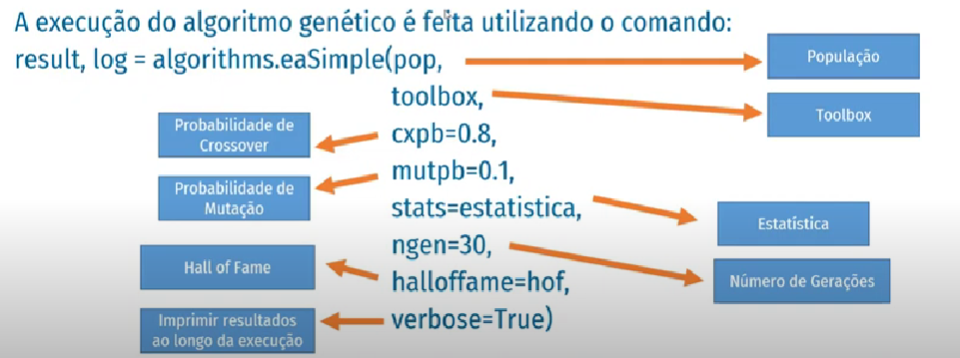

In [29]:
result, log = algorithms.eaSimple(
    pop,
    toolbox,
    cxpb=0.8,
    mutpb=0.1,
    stats=estatistica,
    ngen=100,
    halloffame=hof,
    verbose=True
)

gen	nevals	mean 	max	min
0  	4     	13.25	18 	8  
1  	3     	12.25	18 	8  
2  	4     	13.25	15 	8  
3  	2     	13.25	15 	8  
4  	4     	15   	22 	8  
5  	4     	8    	8  	8  
6  	4     	8    	8  	8  
7  	4     	8    	8  	8  
8  	4     	8    	8  	8  
9  	2     	8    	8  	8  
10 	0     	8    	8  	8  
11 	0     	8    	8  	8  
12 	0     	8    	8  	8  
13 	4     	8    	8  	8  
14 	2     	8    	8  	8  
15 	4     	11.5 	22 	8  
16 	4     	8    	8  	8  
17 	2     	8    	8  	8  
18 	4     	8    	8  	8  
19 	2     	8    	8  	8  
20 	4     	8    	8  	8  
21 	2     	8    	8  	8  
22 	0     	8    	8  	8  
23 	4     	8    	8  	8  
24 	4     	8    	8  	8  
25 	4     	8    	8  	8  
26 	4     	8    	8  	8  
27 	4     	8    	8  	8  
28 	4     	8    	8  	8  
29 	2     	8    	8  	8  
30 	4     	8    	8  	8  
31 	4     	8    	8  	8  
32 	4     	8    	8  	8  
33 	2     	8    	8  	8  
34 	2     	8    	8  	8  
35 	4     	8    	8  	8  
36 	2     	8    	8  	8  
37 	4     	8    	8  	8  
38 	4     	8    	8  	8  


In [30]:
print(result)

[[0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2]]


In [31]:
print(hof)

[[0, 3, 1, 2]]


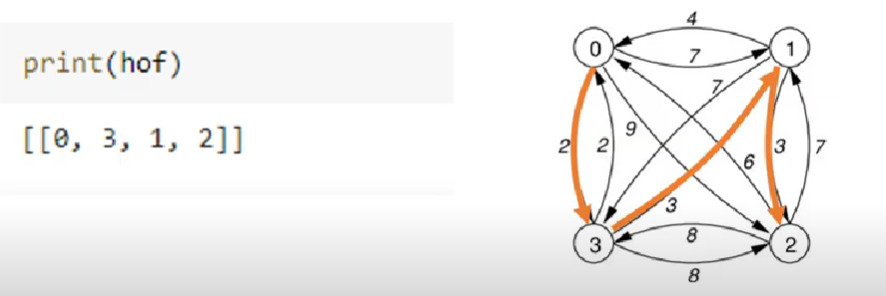

In [32]:
melhor = hof[0]
print(melhor)
aptidao(melhor)

[0, 3, 1, 2]


(8,)

In [33]:
log

[{'gen': 0, 'max': 18.0, 'mean': 13.25, 'min': 8.0, 'nevals': 4},
 {'gen': 1, 'max': 18.0, 'mean': 12.25, 'min': 8.0, 'nevals': 3},
 {'gen': 2, 'max': 15.0, 'mean': 13.25, 'min': 8.0, 'nevals': 4},
 {'gen': 3, 'max': 15.0, 'mean': 13.25, 'min': 8.0, 'nevals': 2},
 {'gen': 4, 'max': 22.0, 'mean': 15.0, 'min': 8.0, 'nevals': 4},
 {'gen': 5, 'max': 8.0, 'mean': 8.0, 'min': 8.0, 'nevals': 4},
 {'gen': 6, 'max': 8.0, 'mean': 8.0, 'min': 8.0, 'nevals': 4},
 {'gen': 7, 'max': 8.0, 'mean': 8.0, 'min': 8.0, 'nevals': 4},
 {'gen': 8, 'max': 8.0, 'mean': 8.0, 'min': 8.0, 'nevals': 4},
 {'gen': 9, 'max': 8.0, 'mean': 8.0, 'min': 8.0, 'nevals': 2},
 {'gen': 10, 'max': 8.0, 'mean': 8.0, 'min': 8.0, 'nevals': 0},
 {'gen': 11, 'max': 8.0, 'mean': 8.0, 'min': 8.0, 'nevals': 0},
 {'gen': 12, 'max': 8.0, 'mean': 8.0, 'min': 8.0, 'nevals': 0},
 {'gen': 13, 'max': 8.0, 'mean': 8.0, 'min': 8.0, 'nevals': 4},
 {'gen': 14, 'max': 8.0, 'mean': 8.0, 'min': 8.0, 'nevals': 2},
 {'gen': 15, 'max': 22.0, 'mean': 11

In [34]:
menores = log.select('min')
maiores = log.select('max')
media = log.select('mean')

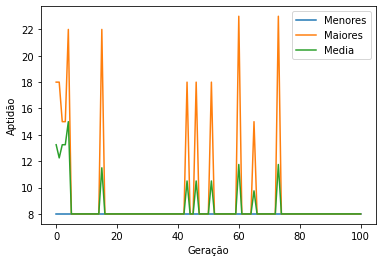

In [35]:
plt.plot(menores, label="Menores")
plt.plot(maiores, label="Maiores")
plt.plot(media, label="Media")
plt.xlabel("Geração")
plt.ylabel("Aptidão")
plt.legend(loc=1)